       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
29994             2               0                     0                  2   
29995             2               0                     0                  3   
29996             2               0                     0                  2   
29997             1               0                     0                  2   
29998             1               0                     1                  2   

       type_of_meal_plan  required_car_

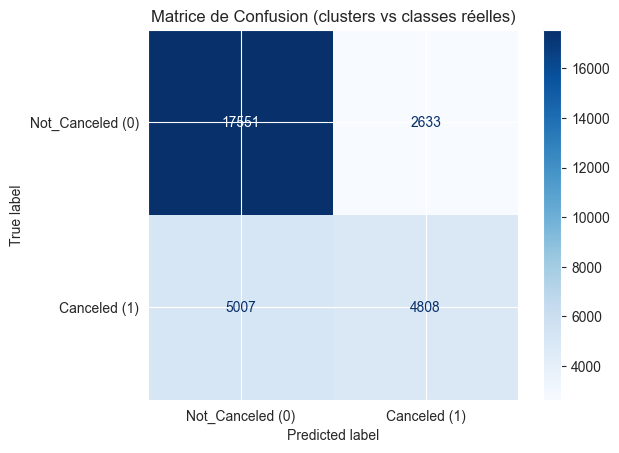

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, AffinityPropagation, OPTICS, Birch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, silhouette_score

import os
os.environ['OMP_NUM_THREADS'] = '4'

data = pd.read_csv("Hotel Reservations.txt")
#data.info()
#data.describe()

X = data.drop(['Booking_ID', 'booking_status'], axis=1)

# 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type'
classes_Meal_Plan = X['type_of_meal_plan'].map({
    'Meal Plan 1': 0,
    'Meal Plan 2': 1,
    'Not Selected' : 2
}).fillna(2).astype(int)

classes_Room_Type = X['room_type_reserved'].map({
    'Room_Type 1': 0,
    'Room_Type 2': 1,
    'Room_Type 3': 2,
    'Room_Type 4': 3,
    'Room_Type 5': 4,
    'Room_Type 6': 5
}).fillna(-1).astype(int)  # ou .dropna() si tu veux exclure les valeurs inattendues

classes_Market_Segment = X['market_segment_type'].map({
    'Offline': 0,
    'Online': 1,
    'Corporate': 2,
    'Aviation': 3,
    'Complementary': 4
}).fillna(-1).astype(int)  # pour gérer les valeurs manquantes ou inattendues

X['type_of_meal_plan'] = classes_Meal_Plan
X['room_type_reserved'] = classes_Room_Type
X['market_segment_type'] = classes_Market_Segment

X_normalized = normalize(X, norm='l2')  # Chaque ligne a une norme L2 = 1

# On prépare y

y = data['booking_status']
classes_binaires = [0 if c == 'Not_Canceled' else 1 for c in y]
y = classes_binaires
#print(y)

km = KMeans(n_clusters=2, n_init='auto')
km.fit(X_normalized)
clusters = km.predict(X_normalized)

cm = confusion_matrix(y, clusters)

# Vérifie si inversion nécessaire pour aligner cluster 0 avec classe 0
# (exemple simple : si la diagonale 0,0 est plus petite que la diagonale 0,1)
if cm[0, 0] + cm[1, 1] < cm[0, 1] + cm[1, 0]:
    # Inverse les labels des clusters
    clusters = 1 - clusters
    cm = confusion_matrix(y, clusters)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Not_Canceled (0)', 'Canceled (1)']
)

disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de Confusion (clusters vs classes réelles)")
plt.show()
